<a href="https://colab.research.google.com/github/sayan0506/Classifying-the-cylindrical-bearings-based-on-needle-count/blob/main/Cynlr_3_working_final_collab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cylindrical Bearings Ring Counts 

In [1]:
from matplotlib import pyplot as plt 
from pathlib import Path
import os
import matplotlib.image as mpimg
import cv2
import numpy as np
import sys
import PIL
from PIL import Image
from google.colab.patches import cv2_imshow
import math
#import cv2_imshow

**Image storing**

Image file path in drive "**/content/drive/MyDrive/Cylindrical Bearings**"

In [ ]:
def images_list(good_image_path, bad_image_path):
  paths_good = sorted(Path(good_image_path).iterdir())
  paths_bad = sorted(Path(bad_image_path).iterdir())
  good_images = {}
  bad_images = {}
  print(paths_good)
  for i, imagename in enumerate(paths_good):
    if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
      continue
    else:
      #print(imagename)
      #print(sorted(os.listdir(good_image_path)))
      good_images[sorted(os.listdir(good_image_path))[i]] = mpimg.imread(imagename)
      #good_images[set(imagename.split(paths_good)).difference(set(paths_good.split(paths_good))]
  for i,imagename in enumerate(paths_bad):
    if str(imagename).find('png') == -1 and str(imagename).find('jpeg') == -1 and str(imagename).find('bmp') == -1:
      continue
    else:
      #print(imagename)  
      bad_images[sorted(os.listdir(bad_image_path))[i]] = mpimg.imread(imagename)
  print(f'Good image names: {good_images.keys()}')
  print(f'Bad image names: {bad_images.keys()}')
  
  # returns both image dictionary
  return good_images, bad_images


**Generating image dictionary**

In [ ]:
good_image_path = '/content/drive/MyDrive/Cylindrical Bearings/Good' 
bad_image_path = '/content/drive/MyDrive/Cylindrical Bearings/Bad' 

good_images, bad_images = images_list(good_image_path, bad_image_path)

[PosixPath('/content/drive/MyDrive/Cylindrical Bearings/Good/1.png'), PosixPath('/content/drive/MyDrive/Cylindrical Bearings/Good/2.png'), PosixPath('/content/drive/MyDrive/Cylindrical Bearings/Good/3.png')]
Good image names: dict_keys(['1.png', '2.png', '3.png'])
Bad image names: dict_keys(['1.png', '2.png', '3.bmp'])


In [ ]:
# in image visualization we pass the figure_title, image dictionary
# image count is the total images we want to visualize 
# assuming max 5 images in a row
# enter number of columns
# Consider each row consist equal number of images
# for dynamic row and column work later

def image_visualization(fig_title, image_dict, row, column, image_count):
  row = row
  col = column
  fig = plt.figure(figsize = (30,8))
  fig.suptitle(fig_title, fontsize = 24)
  for i,imagename in enumerate(image_dict.keys()):
    #print(image_dir[imagename].shape)
    fig.add_subplot(row, col, i+1)
    plt.imshow(image_dict[imagename], cmap = 'binary')
    plt.axis('off')
  plt.show()



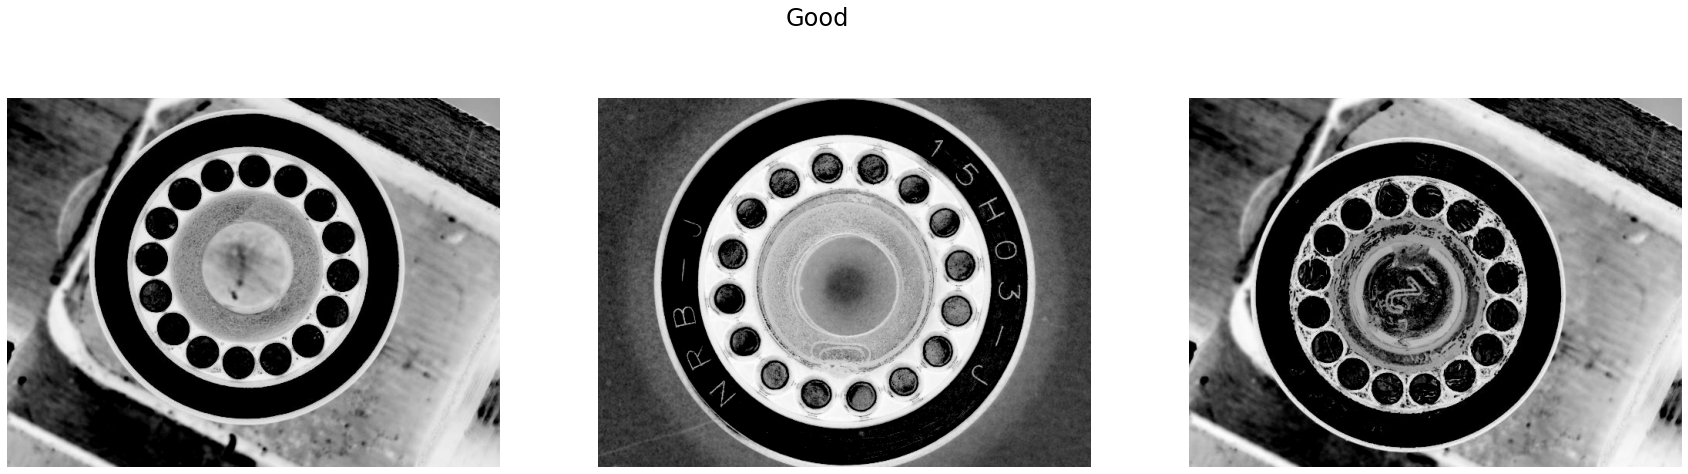

In [ ]:
# good image visualization
fig_title = 'Good'
image_dict = good_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_dict, row, column, image_count)

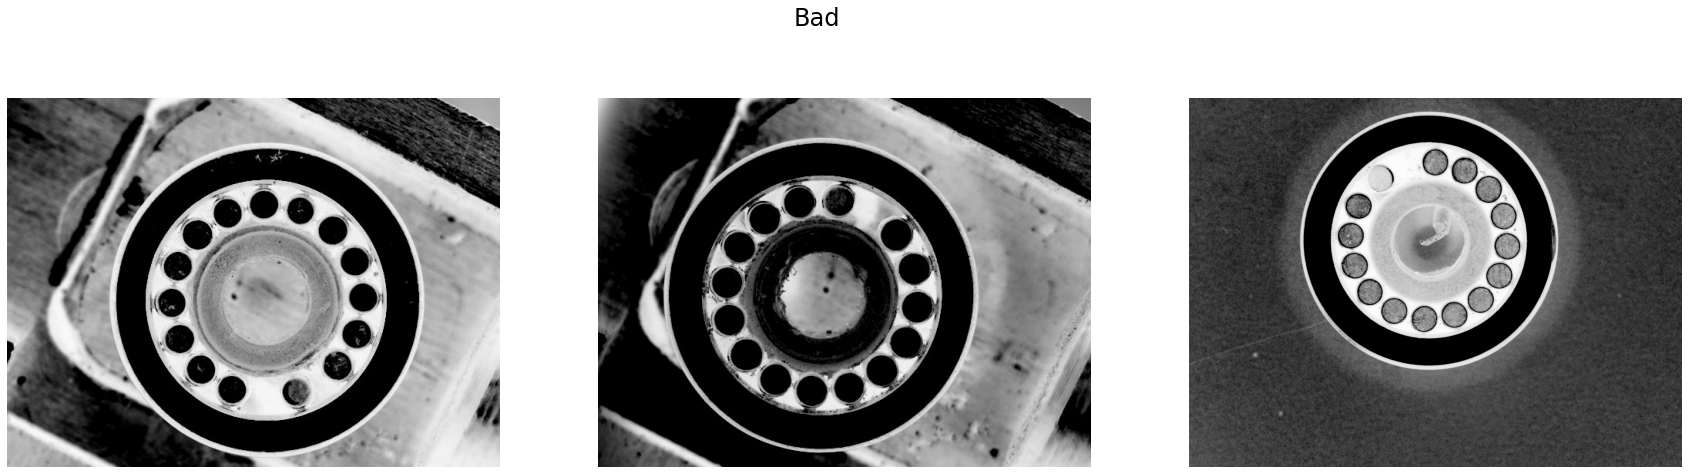

In [ ]:
# good image visualization
fig_title = 'Bad'
image_dict = bad_images
row = 1
column = 3
image_count = 3
image_visualization(fig_title, image_dict, row, column, image_count)

In [ ]:
import cv2
import numpy as np
import sys

img = cv2.imread('/content/drive/MyDrive/Cylindrical Bearings/Bad/3.bmp', 0)

In [ ]:
cv2_imshow(img)

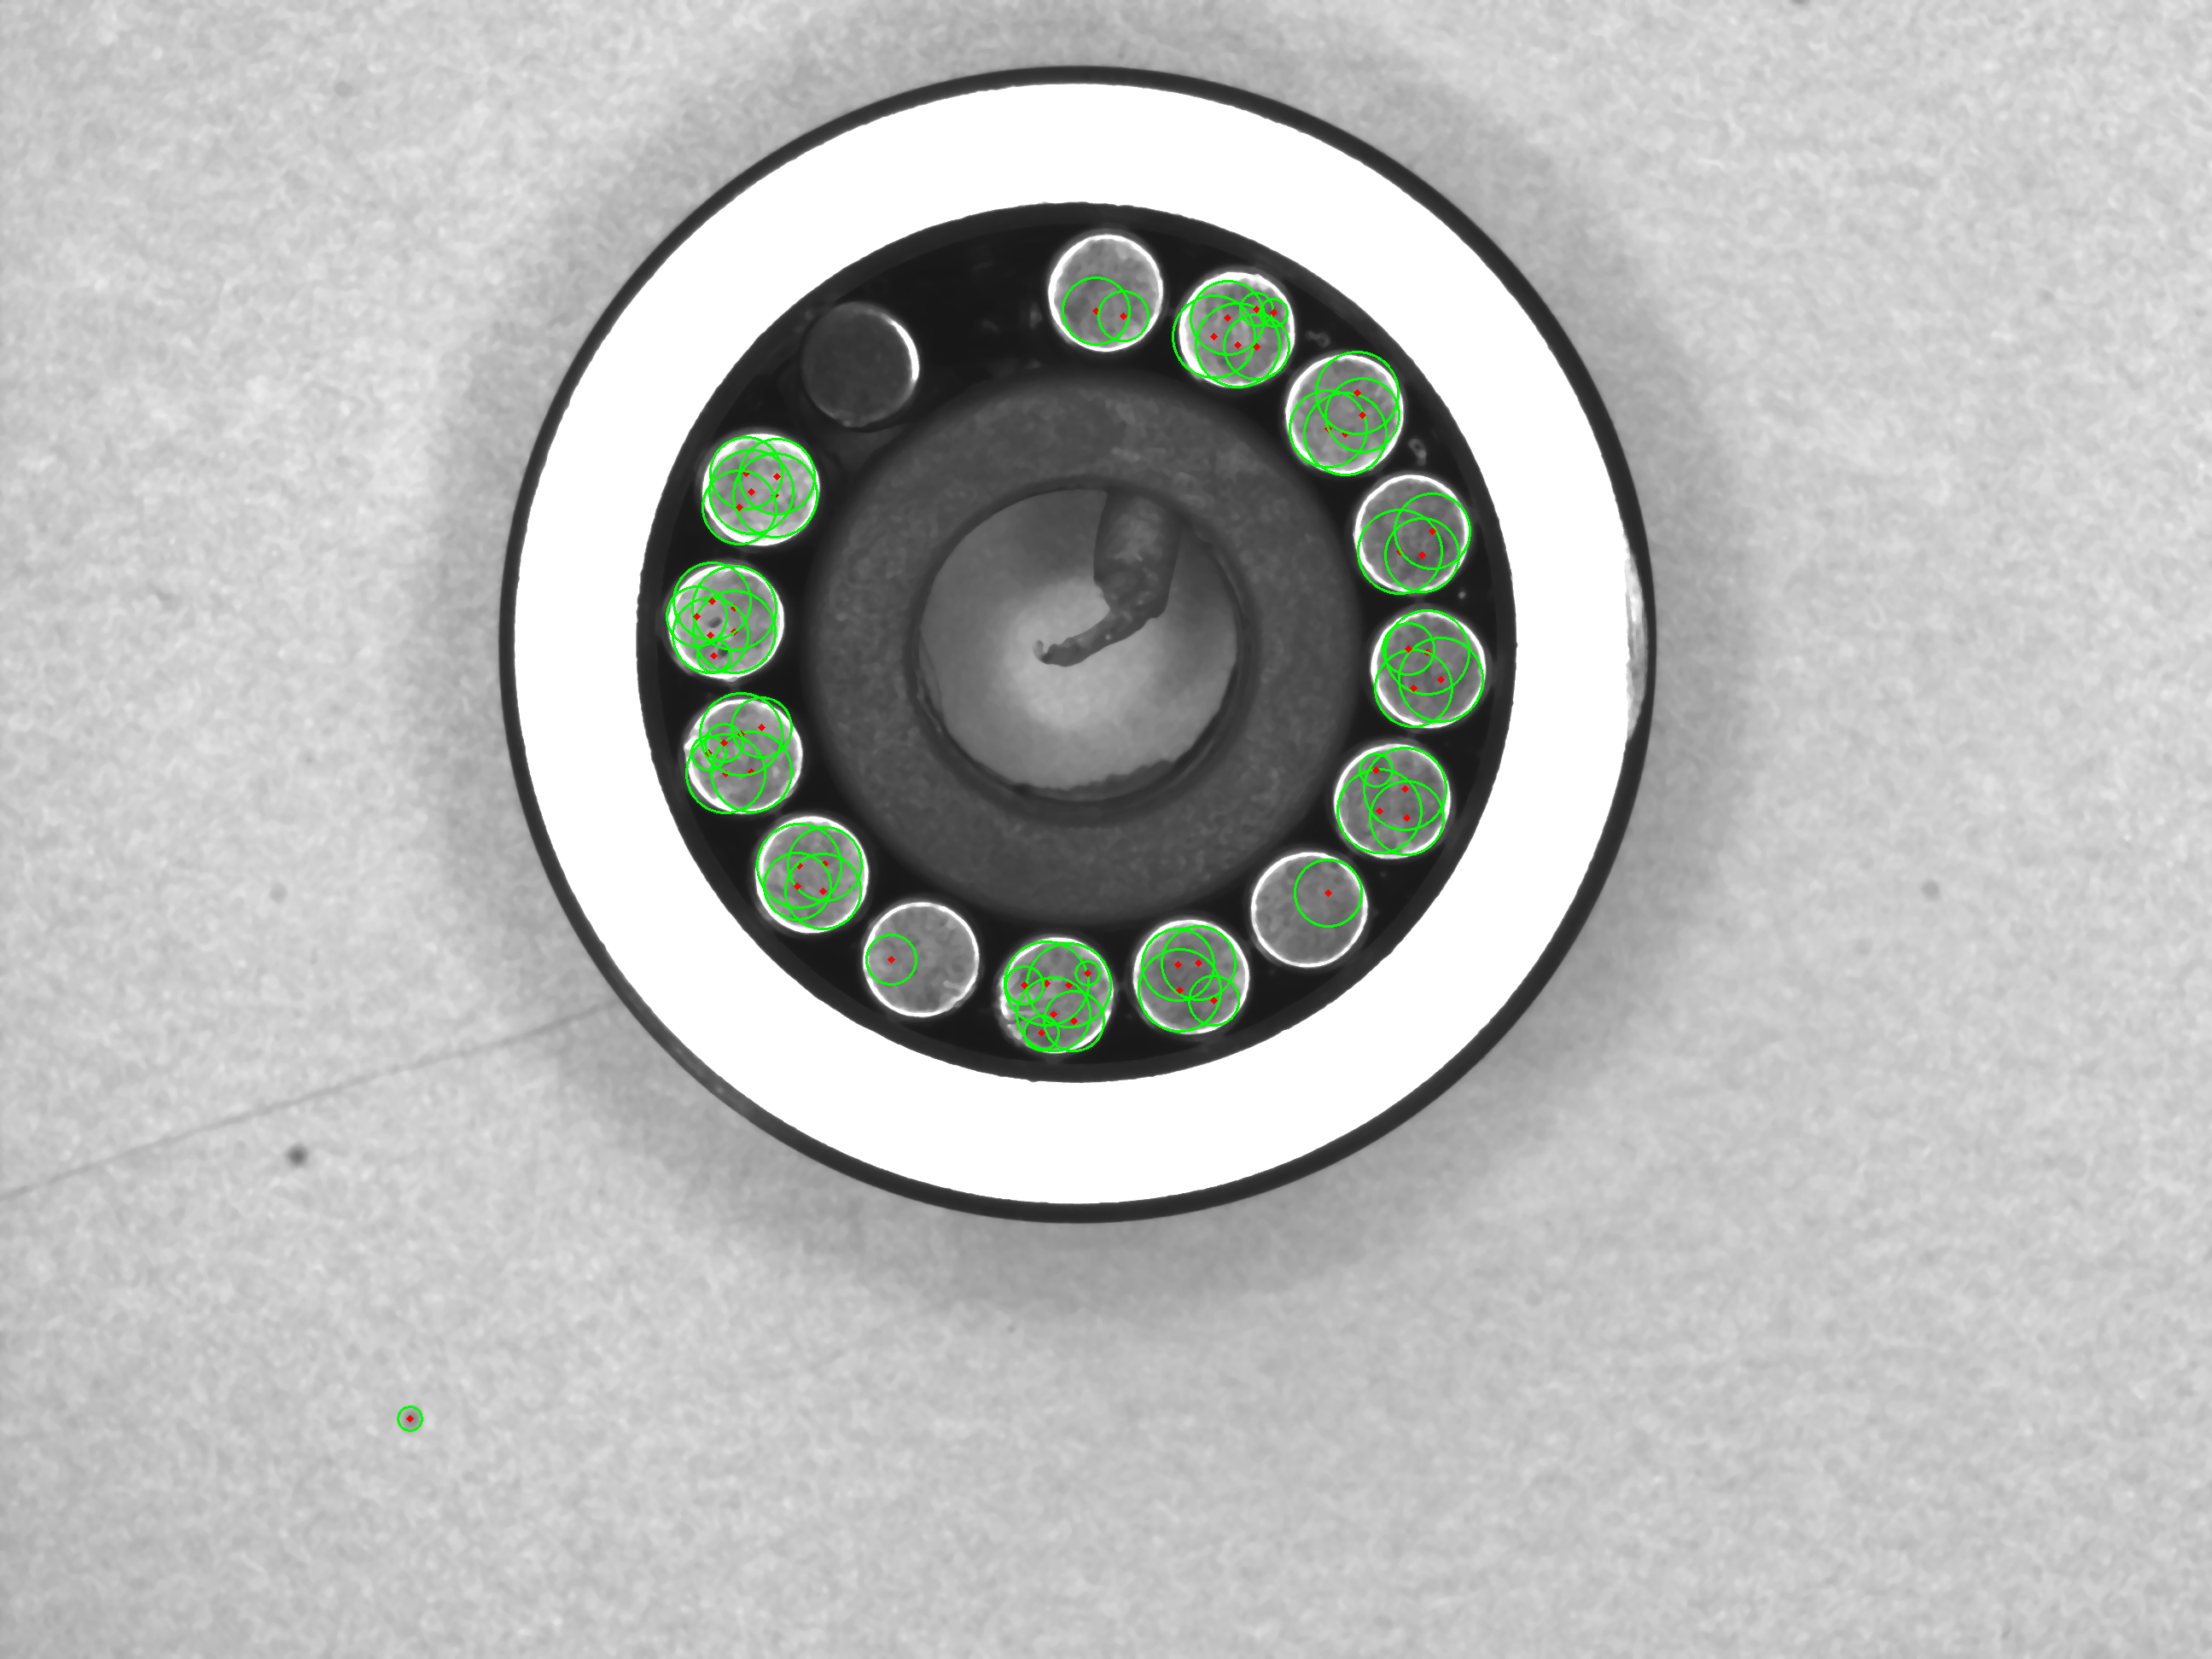

In [ ]:
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=5,maxRadius=20)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2_imshow(cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

In [ ]:
print(f'Circle counts {circles.shape[1]}')

Circle counts 169


In [ ]:
circles.shape

(1, 15, 3)

480 640
Time taken for execution 0.05633068084716797


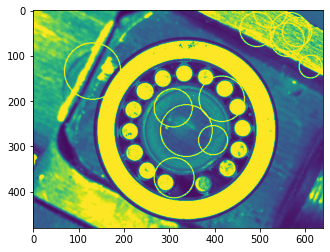

In [ ]:
  
from __future__ import division
import cv2
import numpy as np
import random
import math
import time


original_image = cv2.imread('1.png',0)
#cv2.imshow('Gray Image',original_image)

#Gaussian Blurring of Gray Image
blur_image = cv2.GaussianBlur(original_image,(7,7), sigmaX = -1, sigmaY = -1)
#cv2.imshow('Gaussian Blurred Image',blur_image)

#Using OpenCV Canny Edge detector to detect edges
edged_image_one = cv2.Canny(original_image,75,150)
edged_image_two = cv2.Canny(original_image,75,150)
#cv2.imshow('Edged Image One', edged_image_one)

height,width = edged_image_two.shape
print(height,width)
#finding contours from a image
contours, hierarchy = cv2.findContours(edged_image_one,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

V = np.zeros((height,width))
V_list = []     #list used to update set of pixels after each 4 pixel iteration
listV = []      #list to remove all points of true circle from V
f=0     #failure counter
Tf=10    #number of failures
Tmin=60     #minumum number of pixels left in V
Ta=3       #minimum distance between 2 pixels in V
Td=1        #distance threshold for 4th pizel
Tr=60/100   #ratio pixel

edge_pixels = np.where(edged_image_two == 255)
for i in range(0,len(edge_pixels[0])):
    x=edge_pixels[0][i]
    y=edge_pixels[1][i]
    V[x][y]=1


def main():
    for i in range(0,len(contours)):
        f=0
        circle_detected=0
        if(len(contours[i])>100):
            while (f<=Tf):
                f+=1
                random_pixels=random.sample(list(contours[i]),4)
                x1 = random_pixels[0][0][1]
                y1 = random_pixels[0][0][0]
                x2 = random_pixels[1][0][1]
                y2 = random_pixels[1][0][0]
                x3 = random_pixels[2][0][1]
                y3 = random_pixels[2][0][0]
                x4 = random_pixels[3][0][1]
                y4 = random_pixels[3][0][0]
                
                V[x1][y1] = 0
                V[x2][y2] = 0
                V[x3][y3] = 0
                V[x4][y4] = 0
            
                colinearity = np.absolute(((x2-x1)*(y3-y1))-((x3-x1)*(y2-y1)))
                pixel_dist = check_pixel_distance(x1,y1,x2,y2,x3,y3)

                if(pixel_dist==1 and colinearity!=0):
                    circle_detected=determine_possible_circle(x1,y1,x2,y2,x3,y3,x4,y4,colinearity)
                if(circle_detected==1):
                    break  
               
            
            
           

#function to determine possible circle
def determine_possible_circle(x1,y1,x2,y2,x3,y3,x4,y4,colinearity):
    var1 = x2**2+y2**2 - (x1**2+y1**2)
    var2 = x3**2+y3**2 - (x1**2+y1**2)
    X_center = int(((var1*2*(y3-y1)) - (var2*2*(y2-y1)))/(4*colinearity))
    Y_center = int(((var2*2*(x2-x1)) - (var1*2*(x3-x1)))/(4*colinearity))
    #print X_center,Y_center
    if(X_center>0 and Y_center>0 and X_center<height and Y_center<width):
        radius = int(math.sqrt((x1-X_center)**2 + (y1-Y_center)**2))
        if(radius<70 and radius>20):
            #print radius
            d4 = int(math.sqrt((x4-X_center)**2 + (y4-Y_center)**2))-radius
            if(d4<=Td):
                cv2.circle(original_image,(Y_center,X_center),radius,(255,0,0),2)
                return 1
            else:
                return 0
           
            
            
#function to determine if points are closer than min threshold Ta
def check_pixel_distance(x1,y1,x2,y2,x3,y3):
    d1 = math.sqrt(((x2-x1)**2)+((y2-y1)**2))
    d2 = math.sqrt(((x3-x2)**2)+((y3-y2)**2))
    d3 = math.sqrt(((x3-x1)**2)+((y3-y1)**2))

    if(d1>Ta and d2>Ta and d3>Ta):
        return 1
    else:
        return 0            
            



start_time = time.time()
main()
plt.imshow(original_image)
end_time = time.time()
time_taken = end_time-start_time
print('Time taken for execution',time_taken)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

"\n#Code to close Window\ncv2.imshow('detected Edge',img1)\ncv2.waitKey(0)\ncv2.destroyAllWindows()\n"

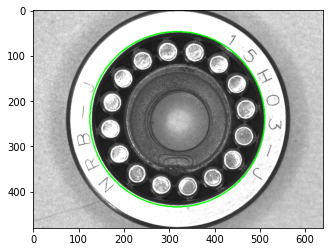

In [ ]:
import cv2
#import cv2.cv as cv
img1 = cv2.imread('/content/Test/2.png')
img = cv2.imread('/content/Test/2.png',0)
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)

edges = cv2.Canny(thresh, 100, 200)
#cv2.imshow('detected ',gray)
cimg=cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, 800, param1 = 50, param2 = 30, minRadius = 0, maxRadius = 0)
for i in circles[0,:]:
    i[2]=i[2]+4
    cv2.circle(img1,(i[0],i[1]),i[2],(0,255,0),2)

plt.imshow(img1)
'''
#Code to close Window
cv2.imshow('detected Edge',img1)
cv2.waitKey(0)
cv2.destroyAllWindows()
'''

In [ ]:
img = Image.open('/content/Test/2.png')
mywidth = 500
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
#img = np.array(img)
#print(img.shape)
img.save('resized.jpg')
img = cv2.imread('resized.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

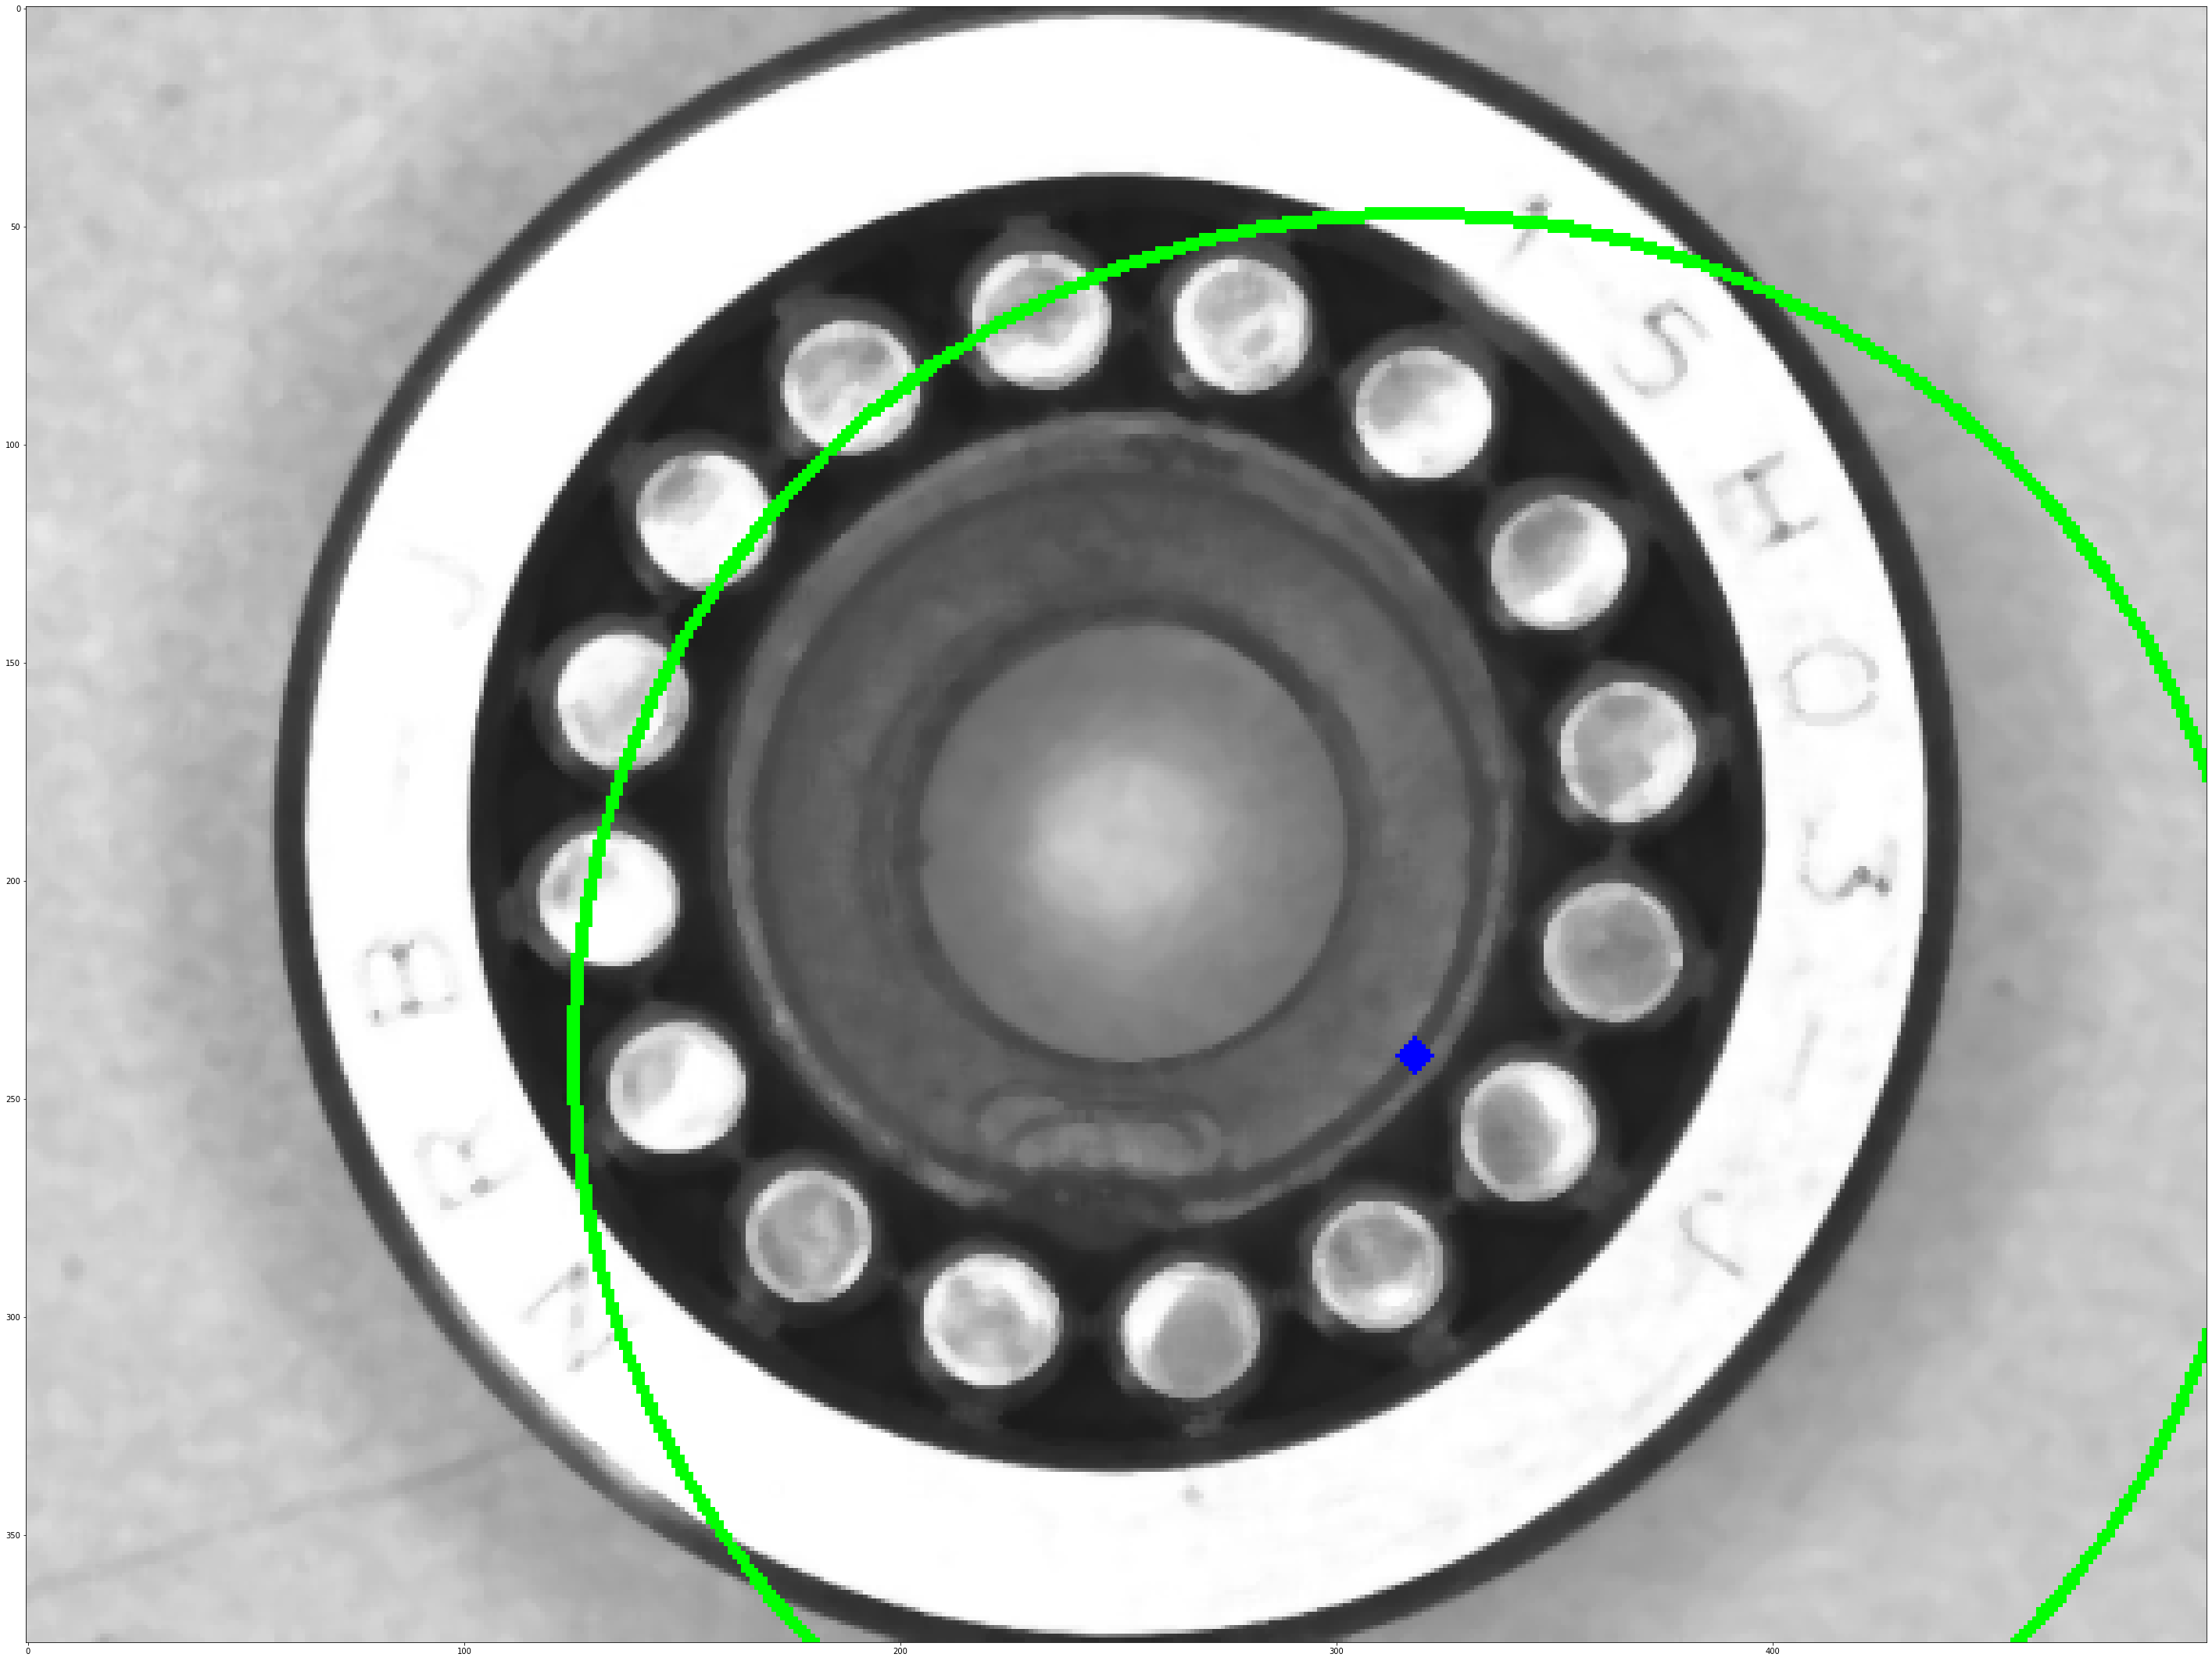

In [ ]:
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img, (7,7), sigmaX = -1, sigmaY = -1)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles1 = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=5,maxRadius=25)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

fig = plt.figure(figsize=(50,50))
plt.imshow(cimg)


In [153]:
img = Image.open('/content/drive/MyDrive/Cylindrical Bearings/Bad/1.png')
mywidth = 500
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
#img = np.array(img)
#print(img.shape)
img.save('resized.jpg')
img = cv2.imread('resized.jpg')

In [154]:

#img = bad_images[1]
#img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#img = img.astype('uint8')
#img = cv2.resize()
print(img.shape)

(375, 500)


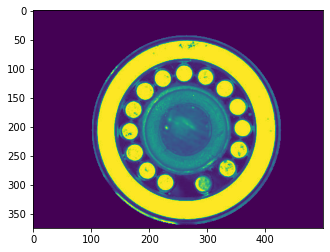

In [155]:
#img = cv2.imread('circles1.png',0)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

# Specify different radii
radii = np.arange(10,310,10)
# Create mask
height,width = img.shape
mask = np.zeros((height,width), np.uint8)
# For each pair of radii...
for idx in range(len(radii)-1):
    # Get the minimum and maximum radius
    # Note you need to add 1 to each minimum
    # as the maximum of the previous pair covers this new minimum
    minRadius = radii[idx]+1
    maxRadius = radii[idx+1]

    # Hough Transform - Change here
    circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,5,
                               param1=25,param2=75,minRadius=minRadius,maxRadius=maxRadius)

    # Skip if no circles are detected - Change here
    if circles is None:
        continue

    circles = np.uint16(np.around(circles))

    # Go over circles, eliminating the ones that are not cocentric enough
    #height, width = img.shape
    #center = (width/2,height/2)
    for i in circles[0,:]:
        i[2]=i[2]+4
        # draw the outer circle
        cv2.circle(mask,(i[0],i[1]),i[2],(255,255,255),thickness=-1)
        #if math.sqrt((center[0]-i[0])**2 + (center[1]-i[1])**2) < 15:
        #cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),1)
            # draw the center of the circle
        #cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)
    masked_data = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(masked_data)

#cv2.imshow('detected circles',cimg)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

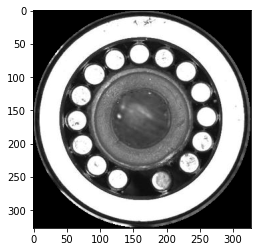

In [156]:
# Apply Threshold
_,thresh = cv2.threshold(mask,1,255,cv2.THRESH_BINARY)

# Find Contour
contours,_ = cv2.findContours(thresh,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
#print(contours)
x,y,w,h = cv2.boundingRect(contours[0])

# Crop masked_data
crop = masked_data[y:y+h,x:x+w]
plt.imshow(crop, cmap = 'gray')

In [157]:
plt.imsave('new.jpg',crop)

In [158]:
img = Image.open('new.jpg')
mywidth = 361
wpercent = (mywidth/float(img.size[0]))
hsize = int((float(img.size[1])*float(wpercent)))
img = img.resize((mywidth,hsize), PIL.Image.ANTIALIAS)
#img = np.array(img)
#print(img.shape)
img.save('resized.jpg')
img = cv2.imread('resized.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

Circle count: 15


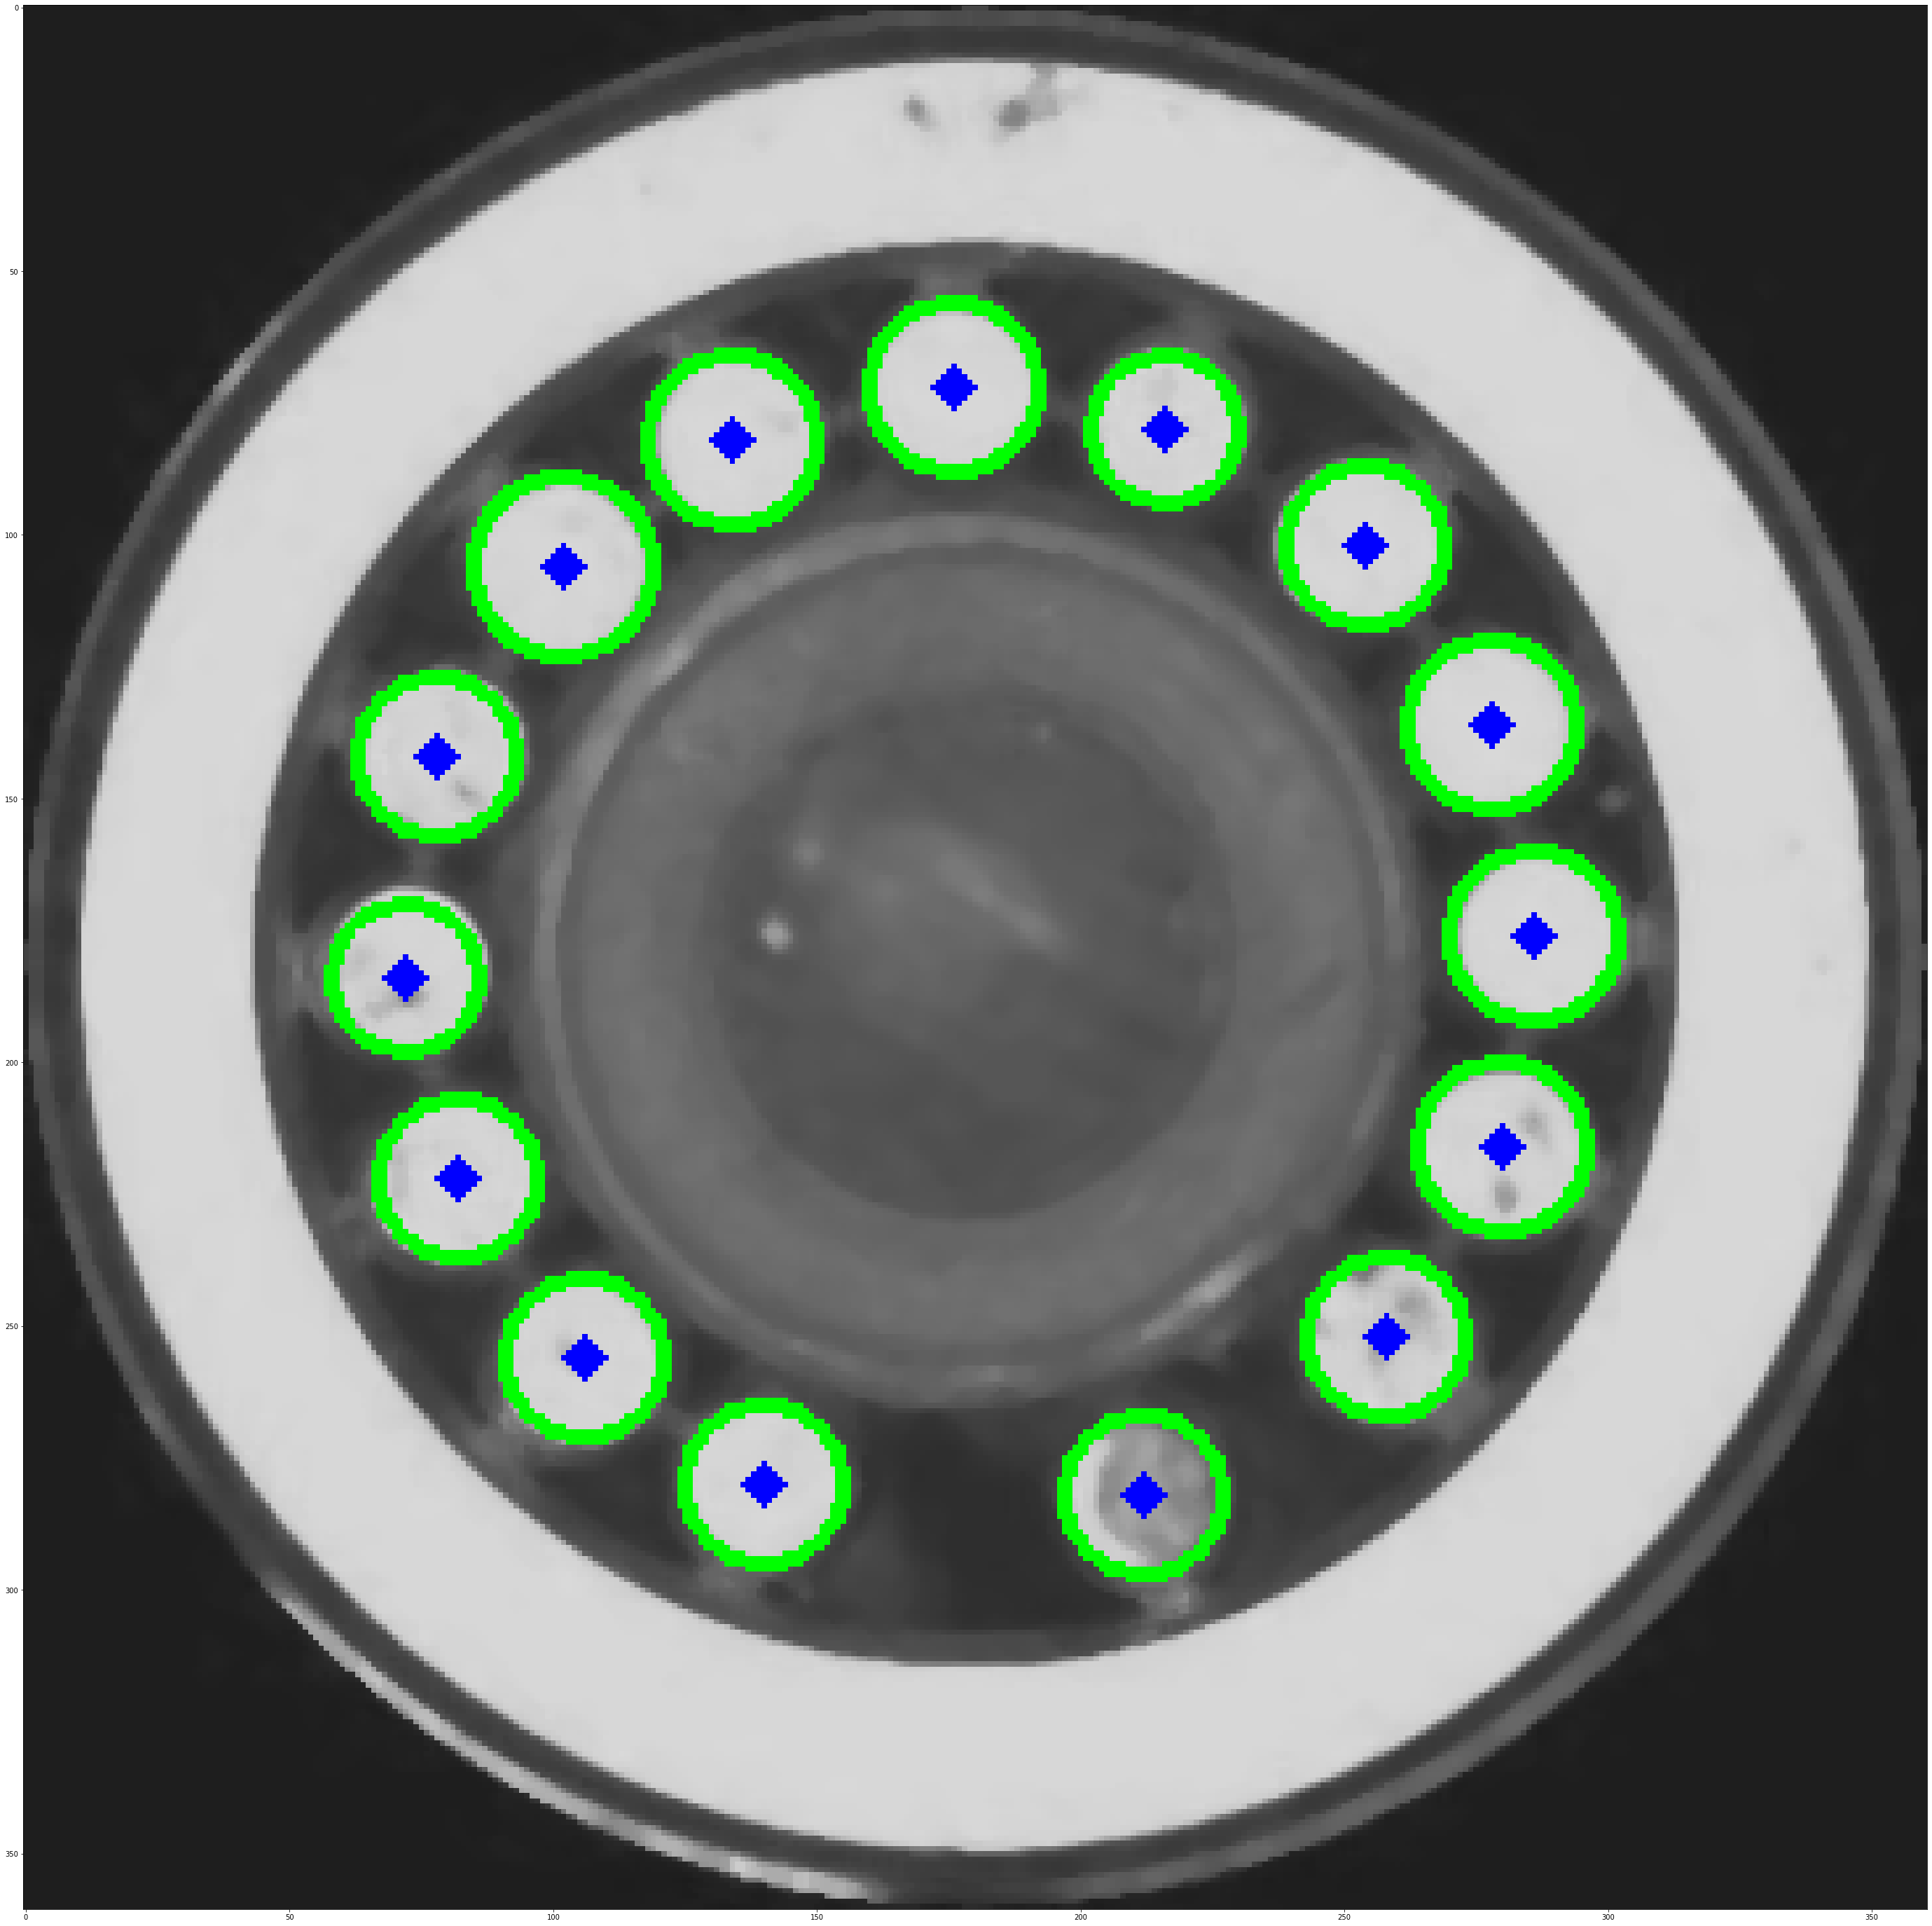

In [159]:
#gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#img = cv2.GaussianBlur(img, (7,7), sigmaX = -1, sigmaY = -1)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
#edges = cv2.Canny(img,20,80,apertureSize = 3)
circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1= 50,param2=30,minRadius=5,maxRadius=25)

circles = np.uint16(np.around(circles))
print(f'Circle count: {len(circles[0,:])}')
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

fig = plt.figure(figsize=(50,50))
plt.imshow(cimg)